In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Connect to database
conn = psycopg2.connect(
    dbname = "projects_personal",
    user = "postgres",
    password = "Krishtheanalyst98",
    host = "localhost",
    port = "5432"
)

## Top-Performing Products and Categories

### 1. Top 5 Most Popular Categories (by Quantity Sold)

In [4]:
query = """
SELECT
    category,
    SUM(quantity) AS total_no_of_quantities_sold
FROM
    retail_sales
GROUP BY
    category
ORDER BY
    total_no_of_quantities_sold DESC
LIMIT
    5;
"""

In [5]:
df = pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\538098690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,category,total_no_of_quantities_sold
0,Furniture,8462.0
1,Food,8387.0
2,Beverages,8358.0
3,Milk Products,8339.0
4,Electric household essentials,8309.0


<function matplotlib.pyplot.show(close=None, block=None)>

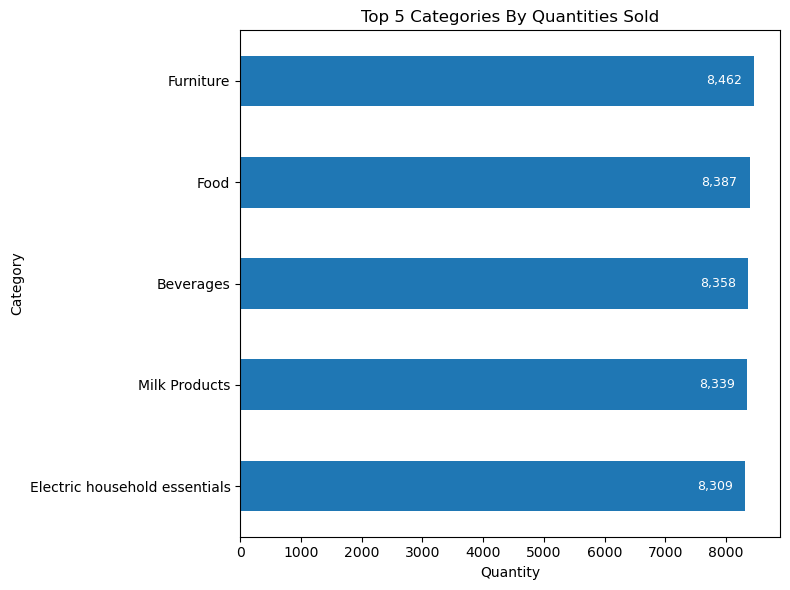

In [6]:
df_grouped = df.groupby("category")["total_no_of_quantities_sold"].sum().sort_values(ascending=True)

ax = df_grouped.plot(kind="barh",figsize=(8,6))

# Add labels
for i, v in enumerate(df_grouped):
    ax.text(v-200,i,f"{int(v):,}", va='center', ha='right', color='white', fontsize=9)

# Add Titles and labels
plt.xlabel("Quantity")
plt.ylabel("Category")
plt.title("Top 5 Categories By Quantities Sold")
plt.tight_layout()
plt.show

### 2. Top 5 Items by Revenue

In [7]:
query = """
SELECT
    item,
    SUM(total_spent) AS "Total Sales"
FROM
    retail_sales
GROUP BY
    item
ORDER BY
    "Total Sales" DESC
LIMIT 5;
"""

In [8]:
df=pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\572404279.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query,conn)


,item,Total Sales
0,Item_25_FUR,25256.0
1,Item_25_EHE,23083.0
2,Item_25_BUT,21894.0
3,Item_24_FUR,21172.0
4,Item_25_FOOD,20541.0


<function matplotlib.pyplot.show(close=None, block=None)>

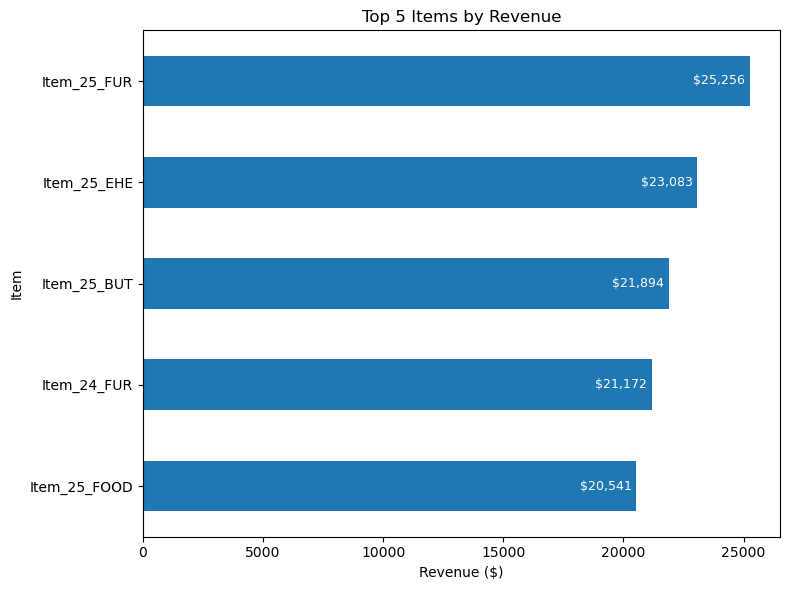

In [9]:
df_grouped=df.groupby("item")["Total Sales"].sum().sort_values(ascending=True)

ax = df_grouped.plot(kind="barh",figsize=(8,6))

# Add labels
for i,v in enumerate(df_grouped):
    ax.text(v-200,i,f"${int(v):,}", va='center', ha='right', color='white', fontsize=9)

# Add titles and Labels
plt.xlabel("Revenue ($)")
plt.ylabel("Item")
plt.title("Top 5 Items by Revenue")
plt.tight_layout()
plt.show

## Customer Analysis

### Top 10 Customers

In [10]:
query = """
SELECT
    customer_id,
    sum(total_spent) AS "Total Spending"
FROM
    retail_sales
GROUP BY
    customer_id
HAVING
    sum(total_spent) IS NOT NULL
ORDER BY
    "Total Spending" DESC
LIMIT 10;
"""

In [11]:
df = pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\538098690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,customer_id,Total Spending
0,CUST_24,64608.0
1,CUST_05,63855.5
2,CUST_16,63185.5
3,CUST_13,63015.5
4,CUST_08,62850.5
5,CUST_15,60749.5
6,CUST_10,60367.5
7,CUST_23,59738.5
8,CUST_21,59639.0
9,CUST_02,59512.5


<function matplotlib.pyplot.show(close=None, block=None)>

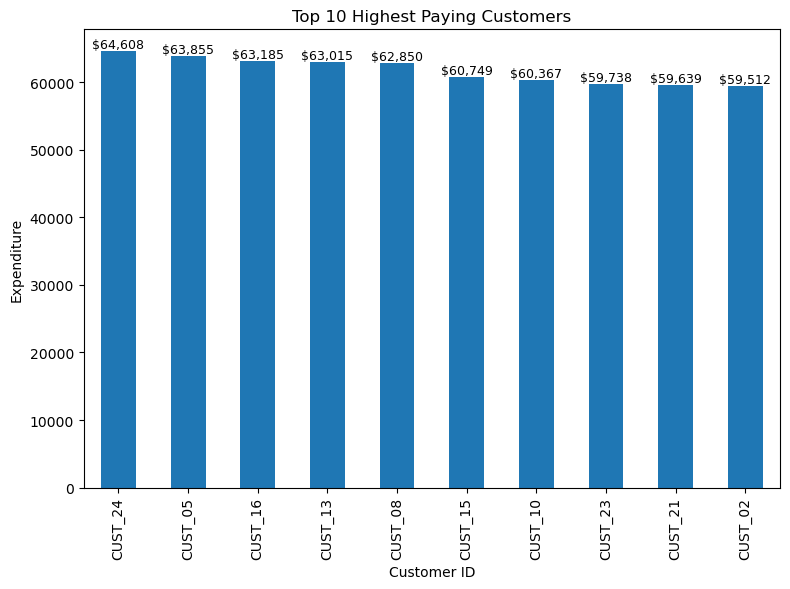

In [12]:
df_grouped=df.groupby("customer_id")["Total Spending"].sum().sort_values(ascending=False)

ax = df_grouped.plot(kind="bar",figsize=(8,6))

# Add labels
for i,v in enumerate(df_grouped):
    ax.text(i,v,f"${int(v):,}", ha='center', va='bottom', color='black', fontsize=9)

# Add titles and Labels
plt.xlabel("Customer ID")
plt.ylabel("Expenditure")
plt.title("Top 10 Highest Paying Customers")
plt.tight_layout()
plt.show

### Average Spending Per Customer

In [13]:
query = """
SELECT
    avg("Total Spending") AS average_spending_per_cutomer
FROM(
    SELECT
    customer_id,
    sum(total_spent) AS "Total Spending"
FROM
    retail_sales
GROUP BY
    customer_id
HAVING
    sum(total_spent) IS NOT NULL
) AS cutomer_spending;
"""

In [14]:
df = pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\538098690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,average_spending_per_cutomer
0,58919.94


<function matplotlib.pyplot.show(close=None, block=None)>

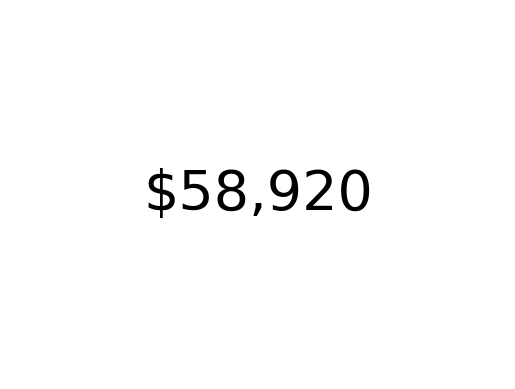

In [15]:
value = 58919.94

plt.figure()
plt.annotate(f"${value:,.0f}", xy=(0.5,0.5), ha='center', va = 'center', fontsize=40)
plt.axis('off')
plt.show

## Monthly Sales Trend

### Monthly Sales Trend for 2022

In [16]:
query = """
SELECT
    TO_CHAR(transaction_date, 'YYYY-MM') AS "Sale Month",
    TO_CHAR(transaction_date, 'Month') AS "Month Name",
    SUM(total_spent) AS "Monthly Revenue"
FROM
    retail_sales
WHERE
    total_spent IS NOT NULL
    AND
    TO_CHAR(transaction_date, 'YYYY-MM') LIKE '%2022%'
GROUP BY
    "Sale Month",
    "Month Name"
ORDER BY
    "Sale Month" ASC;
"""

In [17]:
df = pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\538098690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,Sale Month,Month Name,Monthly Revenue
0,2022-01,January,50525.0
1,2022-02,February,41579.5
2,2022-03,March,38566.0
3,2022-04,April,38650.0
4,2022-05,May,38752.5
5,2022-06,June,40846.0
6,2022-07,July,41098.5
7,2022-08,August,38178.0
8,2022-09,September,44287.0
9,2022-10,October,35580.5


<function matplotlib.pyplot.show(close=None, block=None)>

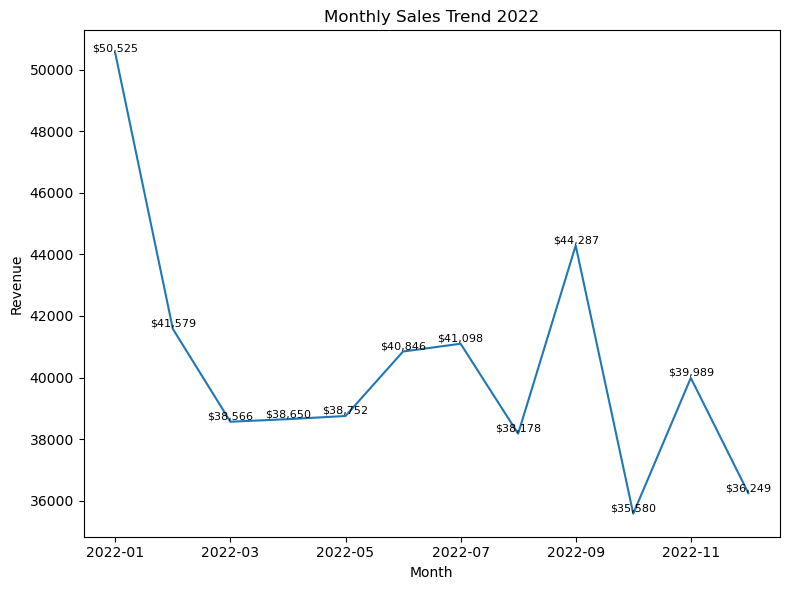

In [18]:
df_grouped=df.groupby("Sale Month")["Monthly Revenue"].sum()

ax = df_grouped.plot(kind="line",figsize=(8,6))

# Add labels
for i,v in enumerate(df_grouped):
    ax.text(i,v,f"${int(v):,}", ha='center', va='bottom', color='black', fontsize=8)

# Add titles and Labels
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Sales Trend 2022")
plt.tight_layout()
plt.show

### Monthly Sales Trend for 2023

In [19]:
query = """
SELECT
    TO_CHAR(transaction_date, 'YYYY-MM') AS "Sale Month",
    TO_CHAR(transaction_date, 'Month') AS "Month Name",
    SUM(total_spent) AS "Monthly Revenue"
FROM
    retail_sales
WHERE
    total_spent IS NOT NULL
    AND
    TO_CHAR(transaction_date, 'YYYY-MM') LIKE '%2023%'
GROUP BY
    "Sale Month",
    "Month Name"
ORDER BY
    "Sale Month" ASC;
"""

In [20]:
df = pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\538098690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,Sale Month,Month Name,Monthly Revenue
0,2023-01,January,45989.5
1,2023-02,February,36520.0
2,2023-03,March,35978.5
3,2023-04,April,37003.0
4,2023-05,May,38563.0
5,2023-06,June,40540.0
6,2023-07,July,43334.0
7,2023-08,August,37238.5
8,2023-09,September,37945.5
9,2023-10,October,36091.5


<function matplotlib.pyplot.show(close=None, block=None)>

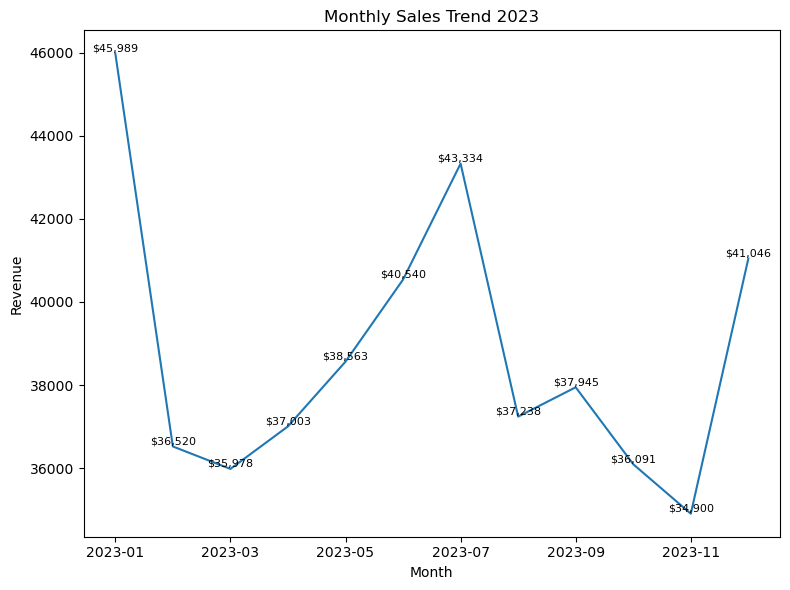

In [21]:
df_grouped=df.groupby("Sale Month")["Monthly Revenue"].sum()

ax = df_grouped.plot(kind="line",figsize=(8,6))

# Add labels
for i,v in enumerate(df_grouped):
    ax.text(i,v,f"${int(v):,}", ha='center', va='bottom', color='black', fontsize=8)

# Add titles and Labels
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Sales Trend 2023")
plt.tight_layout()
plt.show

### Monthly Sales Trend for 2024

In [22]:
query = """
SELECT
    TO_CHAR(transaction_date, 'YYYY-MM') AS "Sale Month",
    TO_CHAR(transaction_date, 'Month') AS "Month Name",
    SUM(total_spent) AS "Monthly Revenue"
FROM
    retail_sales
WHERE
    total_spent IS NOT NULL
    AND
    TO_CHAR(transaction_date, 'YYYY-MM') LIKE '%2024%'
GROUP BY
    "Sale Month",
    "Month Name"
ORDER BY
    "Sale Month" ASC;
"""

In [23]:
df = pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\538098690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,Sale Month,Month Name,Monthly Revenue
0,2024-01,January,44885.0
1,2024-02,February,35054.0
2,2024-03,March,40841.5
3,2024-04,April,43280.5
4,2024-05,May,42254.0
5,2024-06,June,42583.0
6,2024-07,July,39896.0
7,2024-08,August,41459.0
8,2024-09,September,40023.5
9,2024-10,October,41399.5


<function matplotlib.pyplot.show(close=None, block=None)>

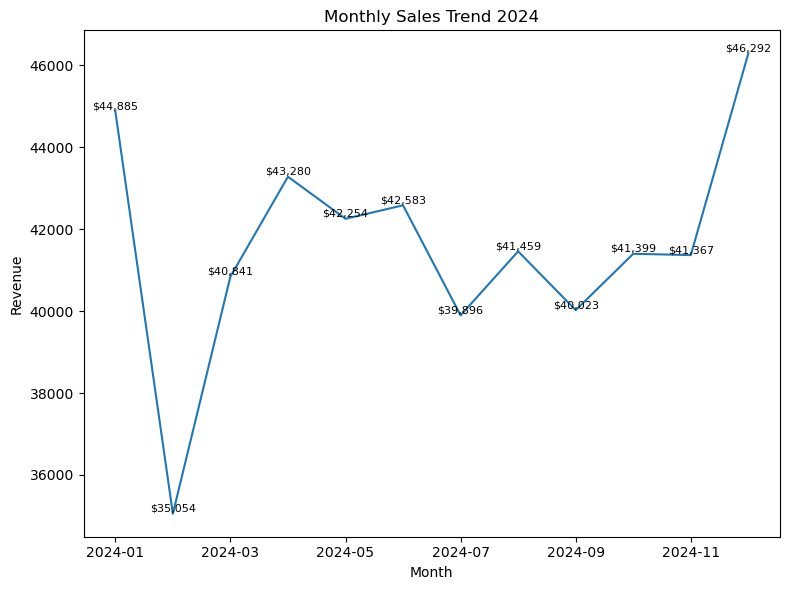

In [24]:
df_grouped=df.groupby("Sale Month")["Monthly Revenue"].sum()

ax = df_grouped.plot(kind="line",figsize=(8,6))

# Add labels
for i,v in enumerate(df_grouped):
    ax.text(i,v,f"${int(v):,}", ha='center', va='bottom', color='black', fontsize=8)

# Add titles and Labels
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Sales Trend 2024")
plt.tight_layout()
plt.show


### Sales by Day of the Week

In [25]:
query = """
SELECT
    EXTRACT(DOW FROM transaction_date) AS day_of_week_number,
    TO_CHAR(transaction_date, 'Day') AS day_of_week_name,
    sum(total_spent)
FROM
    retail_sales
WHERE
    total_spent IS NOT NULL
GROUP BY
    day_of_week_number,
    day_of_week_name
ORDER BY
    day_of_week_number;
"""

In [26]:
df = pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\538098690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,day_of_week_number,day_of_week_name,sum
0,0.0,Sunday,214105.0
1,1.0,Monday,201226.0
2,2.0,Tuesday,206833.0
3,3.0,Wednesday,206771.0
4,4.0,Thursday,208317.0
5,5.0,Friday,221282.5
6,6.0,Saturday,214464.0


Text(0, 0.5, 'Total Sales ($)')

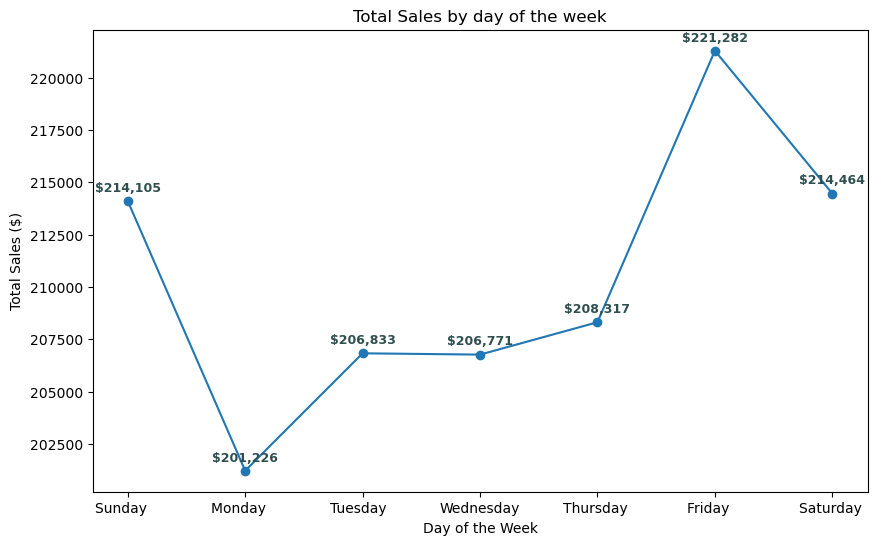

In [27]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['day_of_week_name'], df['sum'], marker='o', linestyle='-')

#Add data label
for x, y in zip(df['day_of_week_name'], df['sum']):
    plt.annotate(
        f'${int(y):,}', 
        (x, y), 
        textcoords="offset points", 
        xytext=(0, 7), 
        ha='center', 
        fontsize=9, 
        color='darkslategray',
        weight='bold'
    )

# Add labels and title
plt.title('Total Sales by day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')

## Discount Effectiveness Analysis

In [28]:
query = """
SELECT
    CASE
        WHEN discount_applied = TRUE THEN 'Discount Applied'
        ELSE 'No Discount Applied'
    END AS discount_status,
    count(*) AS "Total Transactions",
    sum(total_spent) AS "Total Revenue"
FROM
    retail_sales
WHERE
    discount_applied IS NOT NULL
    AND
    total_spent IS NOT NULL
GROUP BY
    discount_status;
"""

In [29]:
df = pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\538098690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,discount_status,Total Transactions,Total Revenue
0,Discount Applied,4001,496880.5
1,No Discount Applied,3971,491632.5


<function matplotlib.pyplot.show(close=None, block=None)>

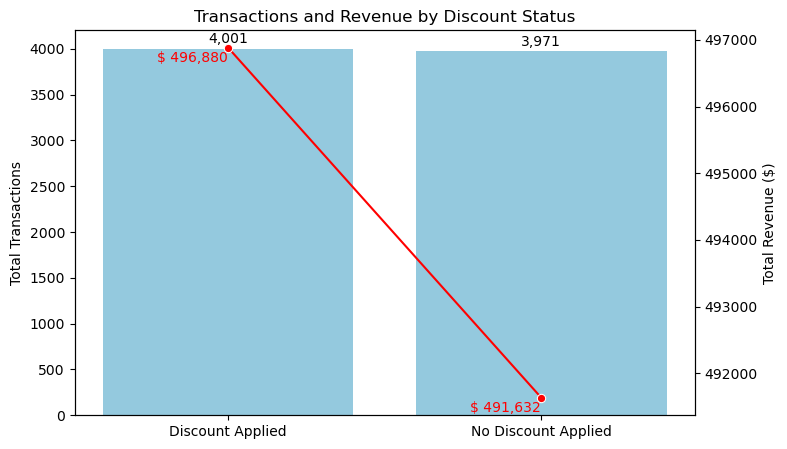

In [30]:
# Creating figure and axis
fig, ax1 = plt.subplots(figsize=(8,5))

# Bar plot for transactions
sns.barplot(
    data=df,
    x='discount_status',
    y='Total Transactions',
    ax=ax1,
    color='skyblue'
)
ax1.set_ylabel('Total Transactions')
ax1.set_xlabel('') #hiding x label

    # Data Labels for Bar
for i, value in enumerate(df['Total Transactions']):
    ax1.text(i,value+30,      #(x,y) position
             f'{value:,}',    #format with comma
             ha = 'center', va = 'bottom', fontsize=10)    

# Line Plot for revenue
ax2 = ax1.twinx()
sns.lineplot(
    data=df,
    x='discount_status',
    y='Total Revenue',
    ax=ax2,
    color = 'red',
    marker = 'o'
)
ax2.set_ylabel('Total Revenue ($)')

    # Data Labels for Line
for i, value in enumerate(df['Total Revenue']):
    ax2.text(i,value-250,     #slightly above point
             f'$ {value:,.0f}',  #round to zero decimals
             color='red', ha='right',va='bottom',fontsize=10)

plt.title('Transactions and Revenue by Discount Status')
plt.xticks(rotation=0)
plt.tight_layout
plt.show

## Granular Sales Trend (Day of Week v. Location)

In [31]:
query = """
SELECT
    EXTRACT(DOW from transaction_date) AS day_of_week_number,
    TO_CHAR(transaction_date, 'Day') AS day_of_week_name,
    sum(CASE
            WHEN location_ = 'In-store' THEN total_spent
            ELSE 0
        END) AS in_store_revenue,
    sum(CASE
            WHEN location_ = 'Online' THEN total_spent
            ELSE 0
        END) AS online_revenue,
    sum(total_spent) AS total_daily_revenue
FROM
    retail_sales
GROUP BY
    day_of_week_number,
    day_of_week_name
ORDER BY
    day_of_week_number;
"""

In [32]:
df = pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\538098690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,day_of_week_number,day_of_week_name,in_store_revenue,online_revenue,total_daily_revenue
0,0.0,Sunday,98912.5,115192.5,214105.0
1,1.0,Monday,94775.5,106450.5,201226.0
2,2.0,Tuesday,103942.0,102891.0,206833.0
3,3.0,Wednesday,104327.5,102443.5,206771.0
4,4.0,Thursday,105254.5,103062.5,208317.0
5,5.0,Friday,109693.0,111589.5,221282.5
6,6.0,Saturday,106662.5,107801.5,214464.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\2114687296.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels = heatmap_data.applymap(lambda v: f'${v:,.0f}')


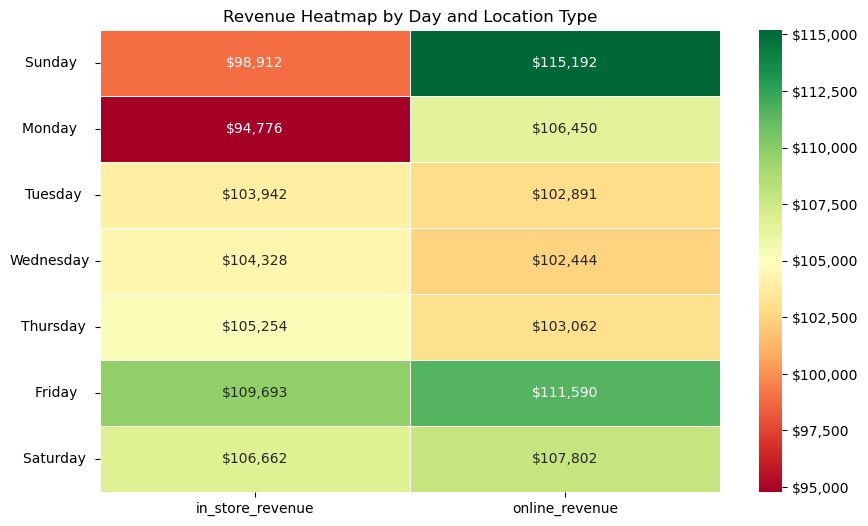

In [33]:
# Dataframe Melting
df_melted = df.melt(
    id_vars=["day_of_week_name"],
    value_vars=["in_store_revenue", "online_revenue"],
    var_name="location_type",
    value_name="revenue"
)

heatmap_data = df_melted.pivot_table(
    index="day_of_week_name",
    columns="location_type",
    values="revenue",
    aggfunc="sum"
)

# ✅ Force correct day order from original df (your df is already correct)
heatmap_data = heatmap_data.reindex(df["day_of_week_name"])

# $ formatted labels
labels = heatmap_data.applymap(lambda v: f'${v:,.0f}')

plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data,
    annot=labels,
    fmt="",
    linewidths=.5,
    cmap="RdYlGn",
    cbar_kws={"format": "${:,.0f}".format}
)

plt.title("Revenue Heatmap by Day and Location Type")
plt.xlabel("")
plt.ylabel("")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\2618908796.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels = heatmap_data.applymap(lambda v: f'${v:,.0f}')


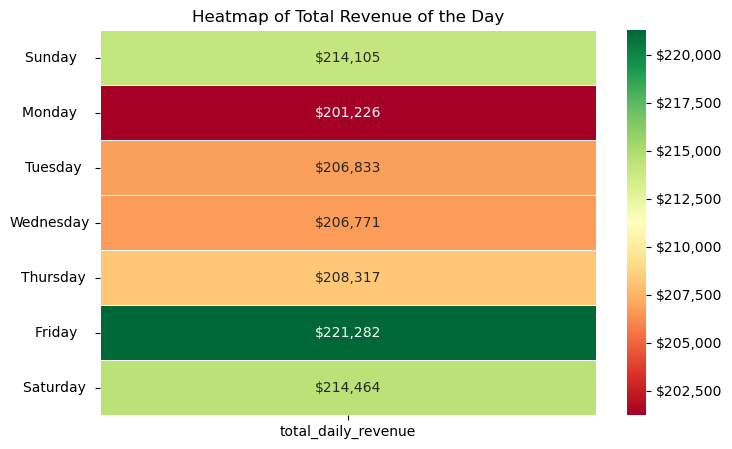

In [34]:
# Dataframe Melting
df_melted = df.melt(
    id_vars=["day_of_week_name"],
    value_vars=["total_daily_revenue"],
    var_name="location_type",
    value_name="revenue"
)

heatmap_data = df_melted.pivot_table(
    index="day_of_week_name",
    columns="location_type",
    values="revenue",
    aggfunc="sum"
)

# ✅ Force correct day order from original df (your df is already correct)
heatmap_data = heatmap_data.reindex(df["day_of_week_name"])

# $ formatted labels
labels = heatmap_data.applymap(lambda v: f'${v:,.0f}')

plt.figure(figsize=(8,5))
sns.heatmap(
    heatmap_data,
    annot=labels,
    fmt="",
    linewidths=.5,
    cmap="RdYlGn",
    cbar_kws={"format": "${:,.0f}".format}
)

plt.title("Heatmap of Total Revenue of the Day")
plt.xlabel("")
plt.ylabel("")
plt.show()

## Top Selling Products by Location

In [35]:
query = """
WITH ItemRevenueByLocation AS (
SELECT
    location_,
    item,
    SUM(total_spent) AS item_revenue_by_location,
    -- Rank the items within each location partition
    ROW_NUMBER() OVER (PARTITION BY location_ ORDER BY SUM(total_spent) DESC) AS rank_by_revenue
FROM
    retail_sales
GROUP BY
    location_,
    item
)

SELECT
    location_,
    item,
    item_revenue_by_location
FROM
    ItemRevenueByLocation
WHERE
    rank_by_revenue <= 3
ORDER BY
    item_revenue_by_location DESC;
"""

In [36]:
df = pd.read_sql_query(query,conn)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\538098690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,location_,item,item_revenue_by_location
0,In-store,Item_25_FUR,13407.0
1,In-store,Item_24_FUR,12837.5
2,In-store,Item_25_EHE,12628.0
3,Online,Item_25_FUR,11849.0
4,Online,Item_25_FOOD,11767.0
5,Online,Item_19_CEA,11264.0


<function matplotlib.pyplot.show(close=None, block=None)>

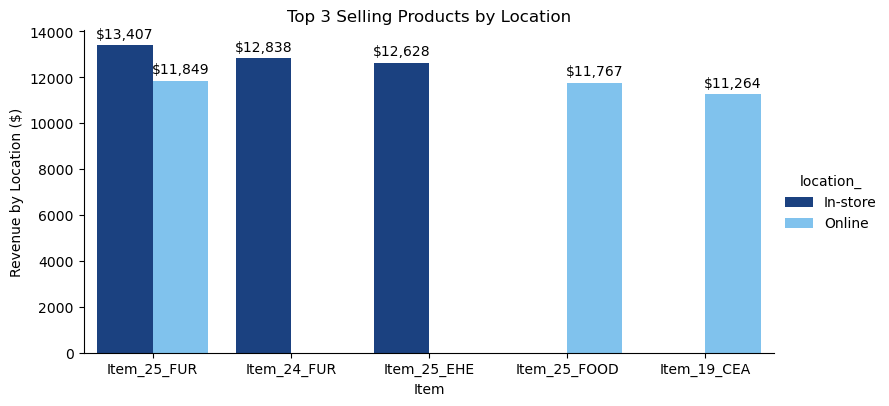

In [46]:
# Create Catplot
g =sns.catplot(
    data=df,
    x="item",
    y="item_revenue_by_location",
    hue="location_",
    kind="bar",
    palette= ["#0A3D91", "#6EC6FF"],
    height=4,
    aspect=2    
)

# x-label rotation
plt.xticks(rotation=0)

#Add Data Label
ax = g.ax
for container in ax.containers:
    labels = [f"${x:,.0f}" for x in container.datavalues]
    ax.bar_label(container, labels=labels, padding =3)

#Layout Adjustment
plt.tight_layout
plt.title("Top 3 Selling Products by Location")
plt.ylabel("Revenue by Location ($)")
plt.xlabel("Item")
plt.show